<a href="https://colab.research.google.com/github/bsjin1122/deep-learning/blob/main/03_keras/part03_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법

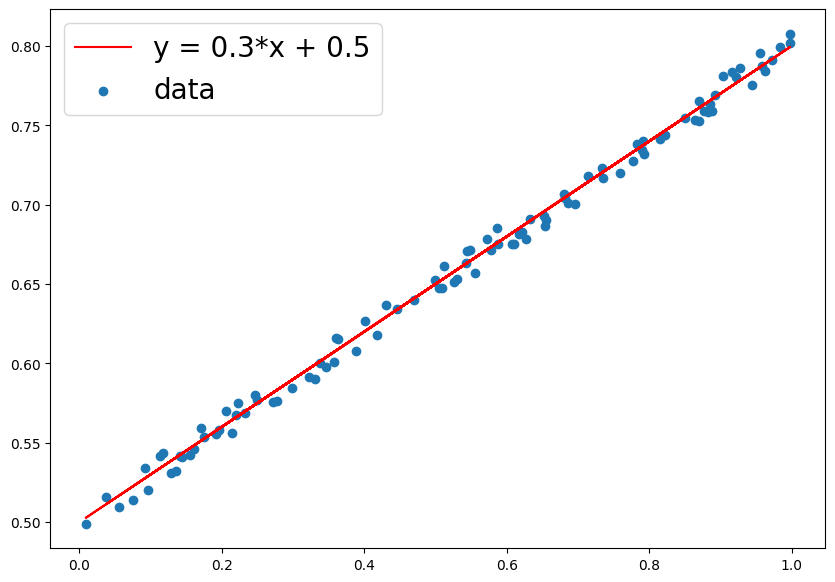

w: 0.3, b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b

    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.18551, b = 0.62300 error = 1.48857
 5 w = 0.18137, b = 0.56712 error = 0.06600
10 w = 0.19906, b = 0.55672 error = 0.04825
15 w = 0.21423, b = 0.54806 error = 0.03541
20 w = 0.22714, b = 0.54069 error = 0.02612
25 w = 0.23813, b = 0.53442 error = 0.01938
30 w = 0.24748, b = 0.52908 error = 0.01450
35 w = 0.25543, b = 0.52453 error = 0.01097
40 w = 0.26221, b = 0.52067 error = 0.00841
45 w = 0.26797, b = 0.51738 error = 0.00656
50 w = 0.27288, b = 0.51457 error = 0.00521
------------------------------------------------------------
51 w = 0.3, b = 0.5 error = 0.00499


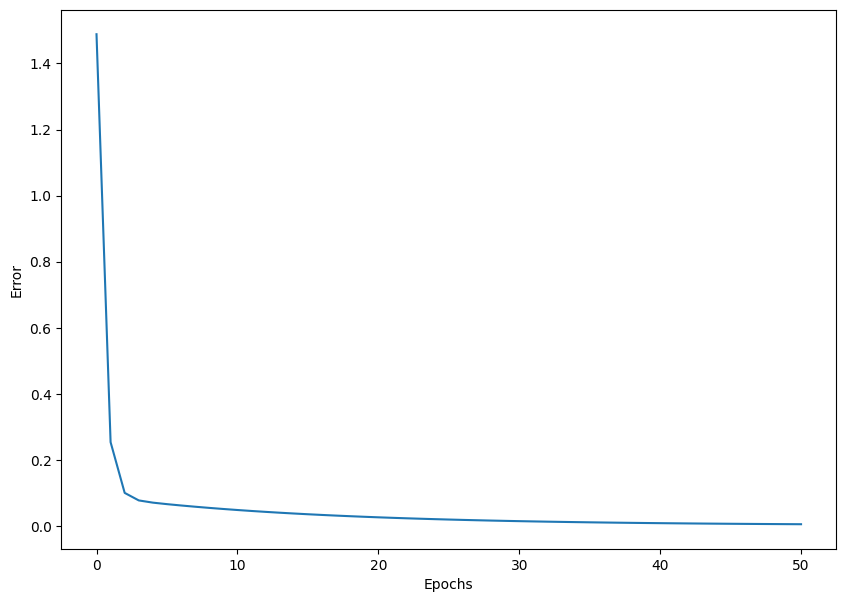

In [ ]:
# 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLu 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

In [ ]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


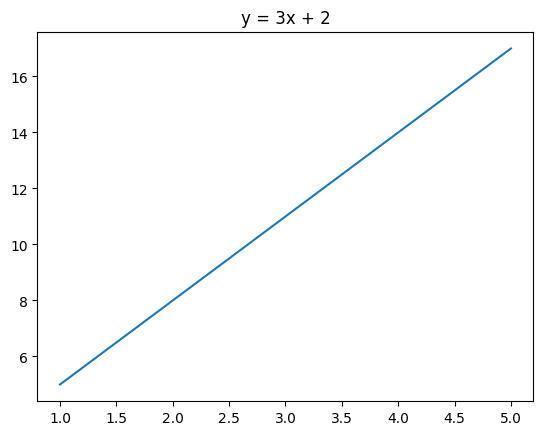

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()


In [ ]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))
# Sequential API를 활용하여 모델을 만들 때, 쌓고자 하는 레이어의 개수는 제한이 없다.

In [ ]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정
    # 150개 샘플에 대하여 4개의 입력변수가 존재한다는 뜻.
    # 각 행은 샘플 데이터를, 열은 입력 변수를 나타낸다.
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 갖는다.<p></p>
y = wx + b에서 입력 데이터는 x값을 나타내는 입력 변수 1개만 존재하기 때문에 input_shape=[1]로 지정한다. <br>
1개의 뉴런을 가지는 Dense레이어는 1개의 출력값을 가지므로 출력값은 y에 대한 모델의 예측 값이다.

<br>
Dense레이어는 use_bias =True가 기본 설정되어있어 상수항 b가 추가된다.

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 파라미터가 2개 (가중치 w와 편향 b 두개.)

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 9.6723e-04 - mae: 0.0267
Epoch 2/5
1/1 [==============================] - 0s 41ms/step - loss: 9.6072e-04 - mae: 0.0266
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 9.5425e-04 - mae: 0.0265
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 9.4779e-04 - mae: 0.0264
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 9.4138e-04 - mae: 0.0263


In [ ]:
# 단순 선형회귀모델 생성
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 581ms/step - loss: 48.9267 - mae: 6.6434
Epoch 2/1200
1/1 [==============================] - 0s 14ms/step - loss: 28.6712 - mae: 5.1290
Epoch 3/1200
1/1 [==============================] - 0s 12ms/step - loss: 16.8662 - mae: 3.9727
Epoch 4/1200
1/1 [==============================] - 0s 12ms/step - loss: 9.9858 - mae: 3.0899
Epoch 5/1200
1/1 [==============================] - 0s 12ms/step - loss: 5.9751 - mae: 2.4157
Epoch 6/1200
1/1 [==============================] - 0s 13ms/step - loss: 3.6369 - mae: 1.9009
Epoch 7/1200
1/1 [==============================] - 0s 14ms/step - loss: 2.2732 - mae: 1.5077
Epoch 8/1200
1/1 [==============================] - 0s 16ms/step - loss: 1.4775 - mae: 1.2073
Epoch 9/1200
1/1 [==============================] - 0s 15ms/step - loss: 1.0128 - mae: 0.9778
Epoch 10/1200
1/1 [==============================] - 0s 18ms/step - loss: 0.7409 - mae: 0.8024
Epoch 11/1200
1/1 [==============================] - 0s

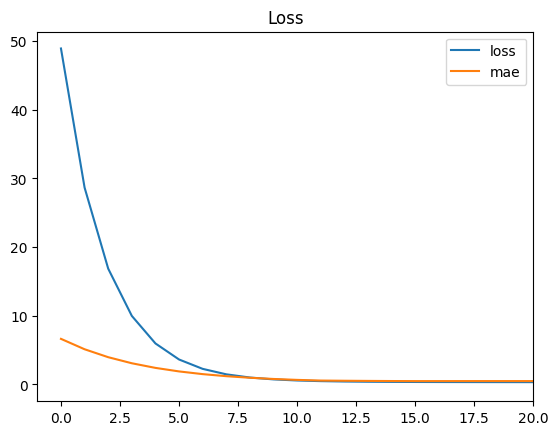

In [ ]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
# 검증
model.evaluate(x, y)
# a모델의 성능을 검증
# 검증 데이터셋을 입력하여 검증한다.
# 별도의 검증 데이터셋을 만들어 두지 않았으므로, 훈련 데이터셋의 x, y를 대입하여 반환되는 결과를 확인한다.

1/1 [==============================] - 0s 235ms/step - loss: 1.1441e-04 - mae: 0.0092


[0.00011441476817708462, 0.00918111763894558]

In [ ]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 106ms/step


array([[32.044373]], dtype=float32)

예측을 위한 입력 x를 인자로 지정, 모델 예측으로 32.044373<br>
데이터 생성 시 정의한 1차식이 y = 3x + 2, x=10일 때, y= 32